# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_targets.csv, test_inputs.csv, test_targets.csv) in the colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [1]:
from google.colab import files
uploaded = files.upload()
%ls

Saving train_labels.csv to train_labels.csv
Saving train_inputs.csv to train_inputs.csv
Saving test_labels.csv to test_labels.csv
Saving test_inputs.csv to test_inputs.csv
sample_data/     test_labels.csv   train_labels.csv
test_inputs.csv  train_inputs.csv


# Import libraries 
Do not use any other Python library.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function: load_logistic_regression_data

This function loads the data for Logistic Regression from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels

In [3]:
def load_logistic_regression_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

# Function: sigmoid

This function implements the logistic sigmoid.

Input:
*   **input**: vector of inputs (numpy array of floats)

Output:
*   **output**: vector of outputs (numpy array of floats)

In [5]:
def sigmoid(input):
  # dummy assignment until the function is filled in
  output = np.zeros(len(input))
  output=1/(1+np.exp(-input))
  return output

# Function: predict_logistic_regression

This function uses a vector of weights to make predictions for a set of inputs.  The prediction for each data point is a distribution over the labels.  Assume that there are only two possible labels {0,1}.

Inputs:
*   **inputs**: matrix of input data points for which we want to make a prediction (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)

Output:
*   **predicted_probabilities**: matrix of predicted probabilities (numpy array of N data points x 2 labels)

In [6]:
def predict_logistic_regression(inputs, weights):

  # dummy assignment until the function is filled in
  predicted_probabilities = np.zeros((inputs.shape[0],2))
  prob=sigmoid(inputs.dot(weights))
  prob_comp=np.ones((len(inputs),1))
  prob_comp=prob_comp-prob
  predicted_probabilities[:,0]=prob[:,0]
  predicted_probabilities[:,1]=prob_comp[:,0]
  return predicted_probabilities


# Function eval_logistic_regression

This function evaluates a set of predictions by computing the negative log probabilities of the labels and the accuracy (percentage of correctly predicted labels).  Assume that there are only two possible labels {0,1}.  A data point is correctly labeled when the probability of the target label is >= 0.5.

Inputs:
*   **inputs**: matrix of input data points for which we will evaluate the predictions (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)
*   **labels**: vector of target labels associated with the inputs (numpy array of N labels)

Outputs:
*   **neg_log_prob**: negative log probability of the set of predictions (float)
*   **accuracy**: percentage of correctly labeled data points (float)

In [8]:
def eval_logistic_regression(inputs, weights, labels): 
  # dummy assignment until the function is filled in
  predicted=predict_logistic_regression(inputs,weights)
  neg_log_prob = 0
  accuracy = 0
  corrected_classification=0
  for i in range(len(inputs)):
      neg_log_prob +=(-np.log(predicted[i,0])*labels[i]-(1-labels[i])*np.log(predicted[i,1]))
      if((predicted[i,0]>=0.5 and labels[i]==1) or ((predicted[i,0]<0.5 and labels[i]==0))):
        corrected_classification+=1
  accuracy=corrected_classification/len(inputs)
  return neg_log_prob, accuracy

Function: initialize_weights

This function initializes the weights uniformly at random in the interval [-0.05,0.05]

Input:
*   **n_weights**: # of weights to be initialized (integer)

Output:
*   **random_weights**: vector of weights (numpy array of floats)

In [ ]:
def initialize_weights(n_weights):
  # dummy assignment until the function is filled in
  random_weights = np.zeros(n_weights)
  random_weights=np.random.uniform(-0.05,0.05,n_weights) 
  return random_weights

# Function train_logistic_regression

This function optimizes a set of weights for logistic regression based on a training set.  Initialize the weights with the function initialize_weights.  Implement Newton's algorithm to optimize the weights.  Stop Newton's algorithm when the maximum change for all weights is less than 0.001 in two consecutive iterations. Assume that there are only two labels {0,1}.

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)



In [84]:
def train_logistic_regression(train_inputs, train_labels, lambda_hyperparam):
  # dummy assignment until the function is filled in
  weights = np.zeros(train_inputs.shape[1])
  weights=np.random.uniform(-0.05,0.05,train_inputs.shape[1])
  weights=np.reshape(weights,(train_inputs.shape[1],1))
  train_labels=np.reshape(train_labels,(len(train_labels),1))
  size_data=train_inputs.shape[0]
  
  def maxchange(w):
    max_change=max(w, key=abs)
    if(max_change<0):
      max_change*=-1
    if(max_change<0.001):
      return True
    else:
      return False
  
  consecutive_iteration=0
  weightsdiff=weights
  one_column=np.ones((size_data,1))
  R=np.zeros((size_data,size_data))
  input_transpose=train_inputs.transpose()
  eye_matrix=np.eye(train_inputs.shape[1])
  while(consecutive_iteration<2):
    if(maxchange(weightsdiff)):
        consecutive_iteration+=1
    else:
      consecutive_iteration=0
    weights_times_inputs=train_inputs.dot(weights)
    sig_vector=sigmoid(weights_times_inputs)
    seg_der=one_column-sig_vector
    der_column=sig_vector*seg_der
    for p in range(len(R)):
        R[p,p]=der_column[p]

    H=(input_transpose.dot(R)).dot(train_inputs)+lambda_hyperparam*eye_matrix
    grad=input_transpose.dot(sig_vector-train_labels)+lambda_hyperparam*weights
    weightsdiff=(np.linalg.inv(H)).dot(grad)
    weights=weights-weightsdiff
  return weights

# Function cross_validation_logistic_regression

This function performs k-fold cross validation to determine the best lambda hyperparameter in logistic regression

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **inputs**: matrix of input points (numpy array of N data points by M+1 features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)

Outputs:
*   **best_hyperparam**: best lambda value for logistic regression (float)
*   **best_neg_log_prob**: negative log probabilty achieved with best_hyperparam (float)
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)



In [27]:
def cross_validation_logistic_regression(k_folds, hyperparameters, inputs, labels):
    # dummy assignments until the function is filled in

    neg_log_probabilities = np.zeros(len(hyperparameters))
    data_length = len(inputs)
    interval_length = data_length // k_folds

    for i in hyperparameters:
        sum_log = 0
        
        for j in range(k_folds):

            start_index = j * interval_length
            train_inputs = np.concatenate((inputs[0:start_index], inputs[start_index + interval_length:]))
            train_labels = np.concatenate((labels[0:start_index], labels[start_index + interval_length:]))
            weights = train_logistic_regression(train_inputs, train_labels, i)
            neg_log, accuracy = eval_logistic_regression(inputs[start_index:start_index + interval_length], weights,
                                                        labels[start_index:start_index + interval_length])

            sum_log += neg_log

        neg_log_probabilities[i] = sum_log / k_folds

    best_hyperparam = 0
    best_neg_log_prob = float('inf')
    for i in range(len(neg_log_probabilities)):
        if (neg_log_probabilities[i] < best_neg_log_prob):
            best_neg_log_prob = neg_log_probabilities[i]
            best_hyperparam = i
    return best_hyperparam, best_neg_log_prob, neg_log_probabilities

# Function: plot_logistic_regression_neg_log_probabilities

Function that plots the negative log probabilities for different lambda values (hyperparameters) in logistic regression based on cross validation

Inputs:
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)

In [13]:
def plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams):
  plt.plot(hyperparams,neg_log_probabilities)
  plt.ylabel('negative log probability')
  plt.xlabel('lambda')
  plt.show()

# Main Logistic Regression code

Load data (rescale the inputs to be in the [-1,1] range, add 1 at the end of each datapoint and rename the labels 5,6 to 0,1).
Use k-fold cross validation to find the best lambda value for logistic regression.
Plot the negative log probabilities for different lambda values.
Test logistic regression with the best lambda value.

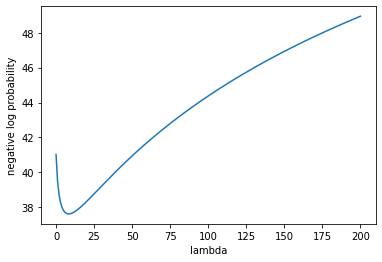

best lambda: 8
best cross validation negative log probability: 37.60806425509725
test accuracy: 0.8727272727272727
test negative log probability: 33.29202902957822


In [87]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_logistic_regression_data()

# rescale inputs in the [-1,1] range
train_inputs = (train_inputs - 8)/8
test_inputs = (test_inputs - 8)/8

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# rename the classes 5,6 to 0,1
train_labels = train_labels.astype(int) - 5
test_labels = test_labels.astype(int) - 5

# lambda values to be evaluated by cross validation
hyperparams = range(201)
k_folds = 10
best_lambda, best_neg_log_prob, neg_log_probabilities = cross_validation_logistic_regression(k_folds,hyperparams,train_inputs,train_labels)

# plot results
plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams)
print('best lambda: ' + str (best_lambda))
print('best cross validation negative log probability: ' + str(best_neg_log_prob))

# train and evaluate with best lambda
weights = train_logistic_regression(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
print('test accuracy: ' + str(accuracy))
print('test negative log probability: ' + str(neg_log_prob))



1)logistic regression finds a linear separator which means that its tacidly based on the assumption that the dataset can be separated to (in our case) two classes by hyperplane W(T)X=const (not completely but with acceptable accuracy). 

whereas  KNN  finds a non-linear separator. Therefore, it is expected when dataset become closer to be completely linearly seperable,logistic regression will outperform KNN whereas KNN will be a more robust choice when our data is far from being linearly separable.

KNN with a known k is non-parametric model(we only need to find the optimal k) whereas in logistic regression we have to find weights(and in case of regularization lambda).
KNN has low bias and it does not assume a particular relationship among dataset(it basically looks at all of the training set again and again) therefore it is more prone to overfitting(being tuned to specific dataset) and worse performance on testing dataset. 

in this particular problem logistic regression gives higher accuracy than KNN as we can see in the plots. it suggests that our data is closer to be linearly-separable(not completely) than to non-linear relationship. 
for example if some points of  class "0" are far from the rest of their points of class "0" and closer to class "1" (but still separable from them by a hyperplane) KNN classify them wrongly as "1" whereas logistic regression correctly classify them as "0"




2)see the code cell below: if dataset of our two classes  is linearly separable(completely),then logistic regression should be able to completely separate classes which means that we should be able to reach **100% accuracy** on training dataset. if sigmoid(inputs.dot(weights))>0.5 we classify that point as "1" and else we classify it as "0" or in other words if  W(T)X>0  we classify as "1" otherwise as 0. so there is hyperplane (W(T)X=0)that can seperate points which means that datasets are linearly seperable.



we calculate accuracies of trained weights for different values of lambda(including lambda=0) on our training dataset and as we can see below the best accuracy that we achieve is 0.88 which is not 1 so it shows that our dataset is **not completely** linearly separable.


In [77]:
def check_lin_sep(inputs,labels,hyperparameters):
  accuracies=np.zeros(len(hyperparameters))
  neg_logs=np.zeros(len(hyperparameters))
  for i in hyperparameters:
    weights = train_logistic_regression(inputs, labels, i)
    neg_log, accuracy = eval_logistic_regression(inputs, weights,labels)
    accuracies[i]=accuracy
    neg_logs[i]=neg_log
         
  best_accuracy=max(accuracies)
  best_index=np.argmax(accuracies)
  print("maximum accuracy is :"+str(best_accuracy))
  return accuracies,neg_logs





In [ ]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_logistic_regression_data()

# rescale inputs in the [-1,1] range
train_inputs = (train_inputs - 8)/8


# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)


# rename the classes 5,6 to 0,1
train_labels = train_labels.astype(int) - 5


# lambda values to be evaluated by cross validation
hyperparams = range(201)
accuracies,neg_logs=check_lin_sep(train_inputs,train_labels,hyperparams)